In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [32]:
pip install --upgrade  tensorflow

In [33]:
chat=pd.read_json('intents.json')

In [34]:
if isinstance(chat, pd.DataFrame):
  print("is DataFrame")
else:
  print('Not a DataFrame')

is DataFrame


In [35]:
print(chat.head())
print(chat.columns)

                                             intents
0  {'tag': 'greeting', 'patterns': ['Hi', 'How ar...
1  {'tag': 'goodbye', 'patterns': ['cya', 'see yo...
2  {'tag': 'creator', 'patterns': ['what is the n...
3  {'tag': 'name', 'patterns': ['name', 'your nam...
4  {'tag': 'hours', 'patterns': ['timing of colle...
Index(['intents'], dtype='object')


In [36]:
chat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   intents  69 non-null     object
dtypes: object(1)
memory usage: 684.0+ bytes


In [37]:
chat.describe()

,intents
count,69
unique,69
top,"{'tag': 'greeting', 'patterns': ['Hi', 'How ar..."
freq,1


In [38]:
df=pd.DataFrame(columns=['patterns','intents'])
for i in chat['intents']:
  for j in i['patterns']:
    sentences = [j,i['tag']]
    df.loc[len(df.index)] = sentences
df.head()

,patterns,intents
0,Hi,greeting
1,How are you?,greeting
2,Is anyone there?,greeting
3,Hello,greeting
4,Good day,greeting


In [39]:
chats=df.copy()
chats

,patterns,intents
0,Hi,greeting
1,How are you?,greeting
2,Is anyone there?,greeting
3,Hello,greeting
4,Good day,greeting
...,...,...
513,Ask me a question,riddle
514,Riddle,riddle
515,how old are you,age
516,when were you made,age


In [40]:
chats.count()

patterns    518
intents     518
dtype: int64

In [41]:
chats.shape

(518, 2)

In [42]:
chats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 518 entries, 0 to 517
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   patterns  518 non-null    object
 1   intents   518 non-null    object
dtypes: object(2)
memory usage: 12.1+ KB


In [43]:
target_intents='intents'
target_patterns='patterns'
DsIntentName='Intents'
DsPatternName='Patterns'
print(f"The {DsIntentName} dataset has {len(df[target_intents].unique())} classes")
print(f"The {DsPatternName} dataset has {len(df[target_patterns].unique())} classes")

The Intents dataset has 66 classes
The Patterns dataset has 497 classes


In [44]:
chats.isnull().sum()

patterns    0
intents     0
dtype: int64

C:\Users\bithi\AppData\Local\Temp\ipykernel_9500\1527839514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_intents,data=chats,palette='viridis')


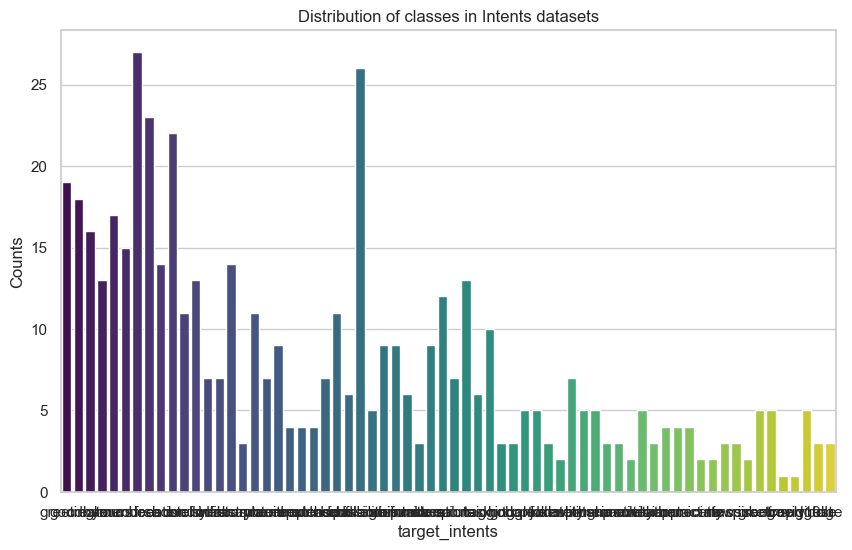

In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(x=target_intents,data=chats,palette='viridis')
plt.title(f"Distribution of classes in {DsIntentName} datasets")
plt.xlabel("target_intents")
plt.ylabel("Counts")
plt.show()


In [46]:
label = chats['intents'].unique().tolist()
label = [m.strip() for m in label]
label

['greeting',
 'goodbye',
 'creator',
 'name',
 'hours',
 'number',
 'course',
 'fees',
 'location',
 'hostel',
 'event',
 'document',
 'floors',
 'syllabus',
 'library',
 'infrastructure',
 'canteen',
 'menu',
 'placement',
 'ithod',
 'computerhod',
 'extchod',
 'principal',
 'sem',
 'admission',
 'scholarship',
 'facilities',
 'college intake',
 'uniform',
 'committee',
 'random',
 'swear',
 'vacation',
 'sports',
 'salutaion',
 'task',
 'ragging',
 'hod',
 'google',
 'thanks',
 'options',
 'jokes',
 'Identity',
 'datetime',
 'whatsup',
 'haha',
 'programmer',
 'insult',
 'activity',
 'exclaim',
 'weather',
 'karan',
 'contact',
 'appreciate',
 'nicetty',
 'no',
 'news',
 'inspire',
 'cricket',
 'song',
 'greetreply',
 'timer',
 'covid19',
 'suggest',
 'riddle',
 'age']

In [47]:
n_label=len(label)
dlabel = {id:label for id, label in enumerate(label)}
idlabel= {label:id for id, label in enumerate(label)}
dlabel

{0: 'greeting',
 1: 'goodbye',
 2: 'creator',
 3: 'name',
 4: 'hours',
 5: 'number',
 6: 'course',
 7: 'fees',
 8: 'location',
 9: 'hostel',
 10: 'event',
 11: 'document',
 12: 'floors',
 13: 'syllabus',
 14: 'library',
 15: 'infrastructure',
 16: 'canteen',
 17: 'menu',
 18: 'placement',
 19: 'ithod',
 20: 'computerhod',
 21: 'extchod',
 22: 'principal',
 23: 'sem',
 24: 'admission',
 25: 'scholarship',
 26: 'facilities',
 27: 'college intake',
 28: 'uniform',
 29: 'committee',
 30: 'random',
 31: 'swear',
 32: 'vacation',
 33: 'sports',
 34: 'salutaion',
 35: 'task',
 36: 'ragging',
 37: 'hod',
 38: 'google',
 39: 'thanks',
 40: 'options',
 41: 'jokes',
 42: 'Identity',
 43: 'datetime',
 44: 'whatsup',
 45: 'haha',
 46: 'programmer',
 47: 'insult',
 48: 'activity',
 49: 'exclaim',
 50: 'weather',
 51: 'karan',
 52: 'contact',
 53: 'appreciate',
 54: 'nicetty',
 55: 'no',
 56: 'news',
 57: 'inspire',
 58: 'cricket',
 59: 'song',
 60: 'greetreply',
 61: 'timer',
 62: 'covid19',
 63: 's

In [48]:
idlabel

{'greeting': 0,
 'goodbye': 1,
 'creator': 2,
 'name': 3,
 'hours': 4,
 'number': 5,
 'course': 6,
 'fees': 7,
 'location': 8,
 'hostel': 9,
 'event': 10,
 'document': 11,
 'floors': 12,
 'syllabus': 13,
 'library': 14,
 'infrastructure': 15,
 'canteen': 16,
 'menu': 17,
 'placement': 18,
 'ithod': 19,
 'computerhod': 20,
 'extchod': 21,
 'principal': 22,
 'sem': 23,
 'admission': 24,
 'scholarship': 25,
 'facilities': 26,
 'college intake': 27,
 'uniform': 28,
 'committee': 29,
 'random': 30,
 'swear': 31,
 'vacation': 32,
 'sports': 33,
 'salutaion': 34,
 'task': 35,
 'ragging': 36,
 'hod': 37,
 'google': 38,
 'thanks': 39,
 'options': 40,
 'jokes': 41,
 'Identity': 42,
 'datetime': 43,
 'whatsup': 44,
 'haha': 45,
 'programmer': 46,
 'insult': 47,
 'activity': 48,
 'exclaim': 49,
 'weather': 50,
 'karan': 51,
 'contact': 52,
 'appreciate': 53,
 'nicetty': 54,
 'no': 55,
 'news': 56,
 'inspire': 57,
 'cricket': 58,
 'song': 59,
 'greetreply': 60,
 'timer': 61,
 'covid19': 62,
 'sugge

In [50]:
chats['label'] = chats['intents'].map(lambda x: idlabel[x.strip()])
chats.head()

,patterns,intents,label
0,Hi,greeting,0
1,How are you?,greeting,0
2,Is anyone there?,greeting,0
3,Hello,greeting,0
4,Good day,greeting,0


In [51]:
X = np.array(chats['patterns'])
X[:10]
print(type(X))

<class 'numpy.ndarray'>


In [52]:
y = np.array(chats['label'])
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=40)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(103,)
(415,)
(103,)


In [54]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

X = np.array(chats['patterns'])

if len(X.shape) == 1:
    X = np.expand_dims(X, axis=1)

print("Original X shape:", X.shape)
print("Total size of X:", X.size)

n_steps = 100
n_features = 1
n_rows = X.shape[0] // n_steps
X_trimmed = X[:n_rows * n_steps, :]
X_reshaped = X_trimmed.reshape((n_rows, n_steps, n_features))

model_lstm = Sequential()
model_lstm.add(LSTM(units=512, activation="tanh", input_shape=(n_steps, n_features), return_sequences=True))
model_lstm.add(Dropout(0.5))
model_lstm.add(LSTM(units=256, activation="tanh", return_sequences=False))
model_lstm.add(Dense(units=128, activation="relu"))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer="adam", loss="mse", metrics=['accuracy'])

model_lstm.summary()


Original X shape: (518, 1)
Total size of X: 518


c:\Users\bithi\OneDrive\Desktop\chat\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 512)       │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 256)            │       787,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,873,153 (7.15 MB)

 Trainable params: 1,873,153 (7.15 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
X_test = np.array(chats['label'])


if len(X_test.shape) == 1:
    X_test = np.expand_dims(X_test, axis=1)
y_true = np.array(chats['label'])
if len(y_true.shape) == 1:
    y_true = np.expand_dims(y_true, axis=1)

print("test",X_test.shape)
y_pre = model_lstm.predict(X_test)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true, y_pre)
print("Mean Squared Error:", mse)
print("Model Output Shape:", model_lstm.output_shape)
print("Target Values Shape:", y_true.shape)
print("Actual values:", y_true.flatten())
print("Predicted values:", y_pre.flatten())

test (518, 1)
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Mean Squared Error: 780.9836443041303
Model Output Shape: (None, 1)
Target Values Shape: (518, 1)
Actual values: [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3
  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 11 12 12 12 12 12 12 12 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 15 15 15 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17
 17 17 18 18 18 18 18 18 18 18 18 19 19 19 19 20 20 20 20 21 21 21 21 22
 22 22 22 22 22 22 23 23 23 23

In [56]:
print(y_pre.shape)
print(y_test.shape)

(518, 1)
(415,)


In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred=y_pre.round()
print(accuracy_score(y_true,y_pre.round()))

0.03667953667953668


In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.04      1.00      0.07        19
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        27
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00        22
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00        14
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00        11
    

c:\Users\bithi\OneDrive\Desktop\chat\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bithi\OneDrive\Desktop\chat\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bithi\OneDrive\Desktop\chat\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

NameError: name 'hello' is not defined